# Prediction of Health Insurance Costs

In [270]:
# Import Python Libraries

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (10,4)
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [271]:
#Import dataset

df = pd.read_csv('insurance.csv')

In [272]:
#Inspect data
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Cleansing

In [273]:
#Look for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

age - 0%
sex - 0%
bmi - 0%
children - 0%
smoker - 0%
region - 0%
charges - 0%


In [274]:
# Look for duplicates

df_duplicates = df[df.duplicated(keep=False)]
print("Duplicated Entries: " , df_duplicates.duplicated().sum())
df_duplicates

Duplicated Entries:  1


,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [275]:
# Drop duplicate

df = df.drop_duplicates()
print("Duplicated Entries: " ,df.duplicated().sum())

Duplicated Entries:  0


In [276]:
# Categorical Data Encoding - Sex

df['female'] = np.where(df['sex']== 'female', 1, 0)
df.head()

,age,sex,bmi,children,smoker,region,charges,female
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


In [277]:
# Categorical Data Encoding - Smoker

df['non-smoker'] = np.where(df_nodups['smoker']== 'yes', 0, 1)
df.head()

,age,sex,bmi,children,smoker,region,charges,female,non-smoker
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1


In [278]:
# Categorical Data Encoding - Region

region_dummy = pd.get_dummies(df['region'])
df = pd.concat([df,region_dummy],axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,female,non-smoker,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0,1,0,0


In [279]:
# Categorical Data Encoding - Children

children_dummy = pd.get_dummies(df['children'])
df = pd.concat([df,children_dummy],axis=1)
df = df.rename(columns={0: "children0", 1: "children1", 2: "children2", 3: "children3", 4: "children4", 5: "children5"})
df.head()

,age,sex,bmi,children,smoker,region,charges,female,non-smoker,northeast,northwest,southeast,southwest,children0,children1,children2,children3,children4,children5
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,0,0,1,1,0,0,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0,0,1,0,0,1,0,0,0,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0,0,1,0,0,0,0,1,0,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0,1,0,0,1,0,0,0,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0,1,0,0,1,0,0,0,0,0


# Exploratory Data Analysis

In [342]:
# Descriptive Statistics

df[{"age", "bmi", "children", "charges", 'female', 'non-smoker'}].describe()

,bmi,female,charges,age,non-smoker,children
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,30.663452,0.495138,13279.121487,39.222139,0.795064,1.095737
std,6.100468,0.500163,12110.359656,14.044333,0.403806,1.205571
min,15.960000,0.000000,1121.873900,18.000000,0.000000,0.000000
25%,26.290000,0.000000,4746.344000,27.000000,1.000000,0.000000
50%,30.400000,0.000000,9386.161300,39.000000,1.000000,1.000000
75%,34.700000,1.000000,16657.717450,51.000000,1.000000,2.000000
max,53.130000,1.000000,63770.428010,64.000000,1.000000,5.000000


* BMI Range is 15.96-53.13 / Average BMI is 30.6 (Obese)
* 49.5% of Patients are Female
* Average Medical Cost is 13,279
* Age Range is 18-64 / Average Age is 39
* 79.5% of Patients are Non-Smokers
* Average Number of Dependents is 1

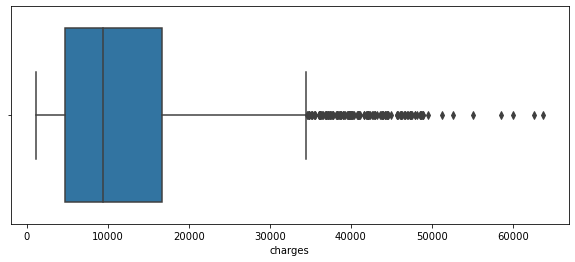

In [311]:
# Boxplot - Charges (looking at outliers)

ax = sns.boxplot(x='charges', data=df)

<AxesSubplot:xlabel='charges', ylabel='Count'>

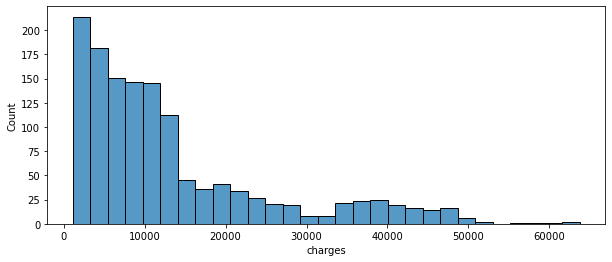

In [281]:
# Histogram - Charges (Positively Skewed)

sns.histplot(df['charges'])

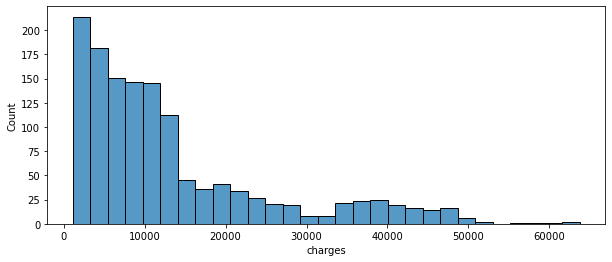

In [313]:
# Log Transformation 

df['log_charges'] = np.log(df['charges'])
ax = sns.histplot(x='charges', data=df)

## Age

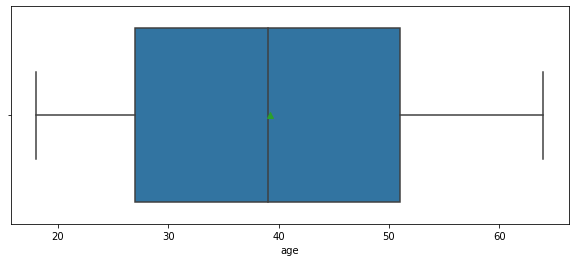

In [369]:
ax = sns.boxplot(x='age',data=df, showmeans=True)

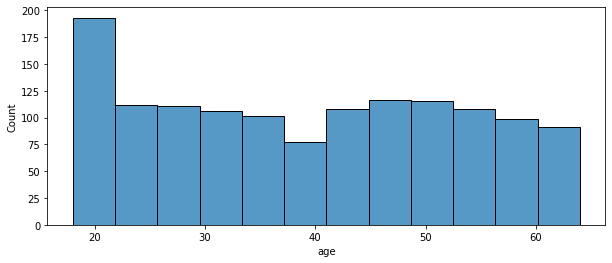

In [336]:
ax1 = sns.histplot(x='age', data=df)

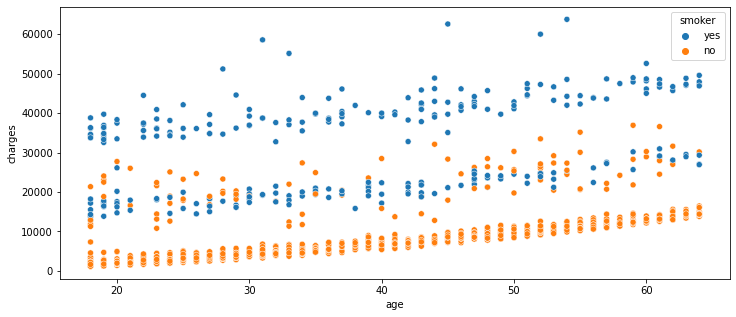

In [378]:
plt.figure(figsize = (12,5))
ax2 = sns.scatterplot(x='age', y='charges', data=df, hue='smoker')

* Medical costs increase with age.

## Sex

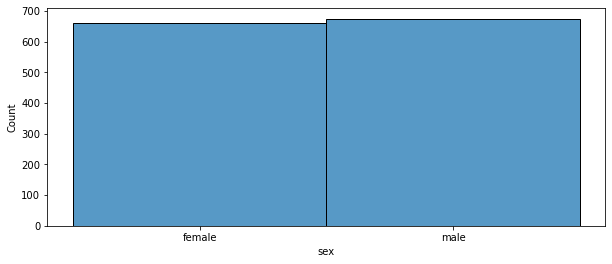

In [379]:
ax = sns.histplot(x='sex',data=df)

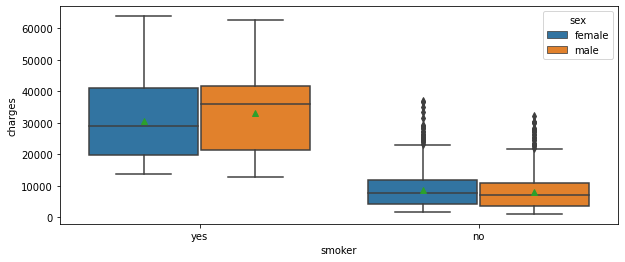

In [349]:
ax2 = sns.boxplot(x="smoker", y="charges", hue="sex",
...                  data=df, showmeans=True)

* Males who smoke have the highest average medical costs.

## BMI

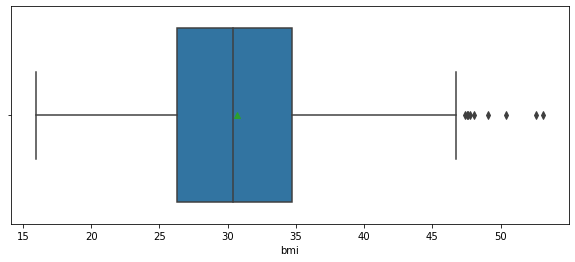

In [351]:
ax = sns.boxplot(x='bmi', data=df, showmeans=True)

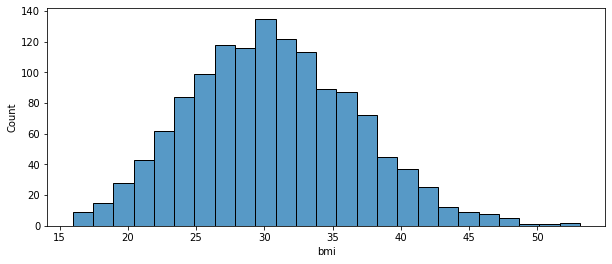

In [358]:
ax1 = sns.histplot(x='bmi', data=df)

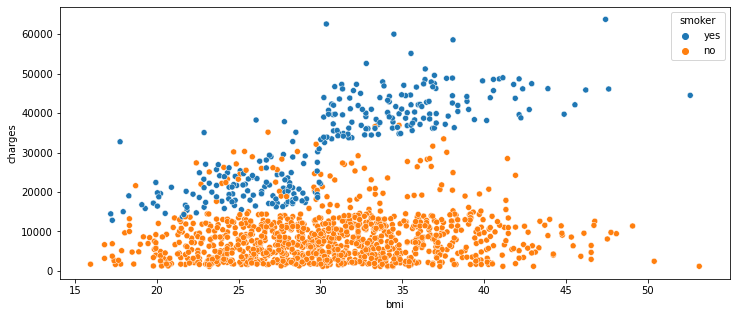

In [382]:
plt.figure(figsize = (12,5))
ax2 = sns.scatterplot(x='bmi', y='charges', data=df, hue='smoker')

* Medical costs increase with BMI for smokers

## Children

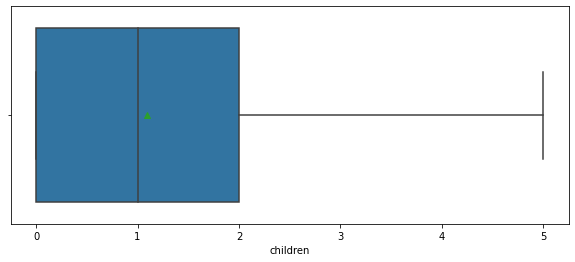

In [352]:
ax = sns.boxplot(x='children', data=df, showmeans=True)

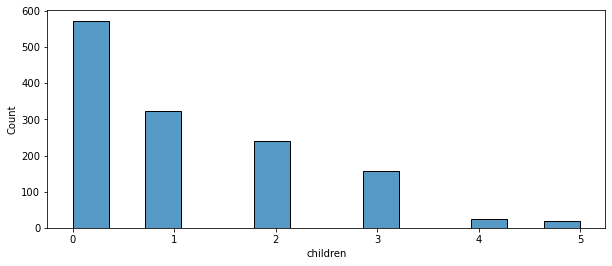

In [321]:
ax1 = sns.histplot(x='children', data=df)

## Smoker

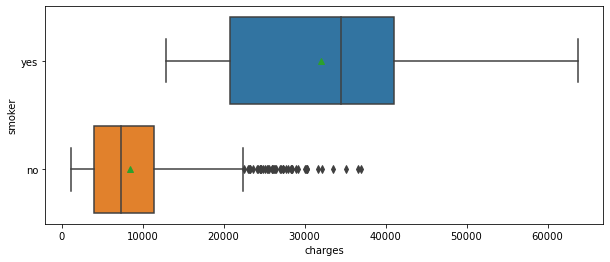

In [367]:
ax = sns.boxplot(y='smoker', x='charges',data=df, showmeans=True)

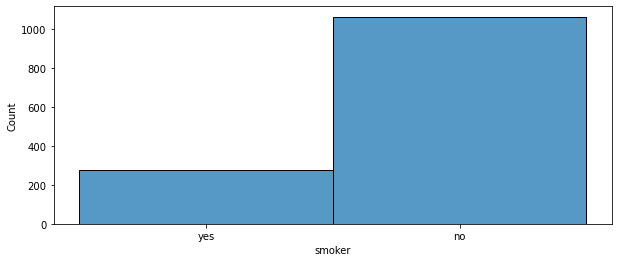

In [362]:
ax1 = sns.histplot(x='smoker',data=df)

* There are more non-smokers compared to smokers
* Smokers have higher medical costs

## Region

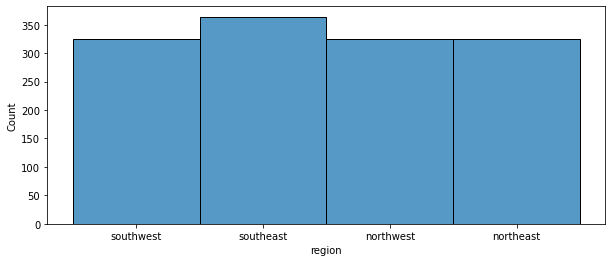

In [323]:
ax1 = sns.histplot(x='region', data=df)

In [292]:
df.groupby("region").charges.agg(["mean","median","count"])

,mean,median,count
region,,,
northeast,13406.384516,10057.652025,324
northwest,12450.840844,8976.977250,324
southeast,14735.411438,9294.131950,364
southwest,12346.937377,8798.593000,325


* The Southeast has the most claims and the highest average medical costs.

# Insights

# <span style='color:blue '> Inferential Statistical Analysis </span>

<function matplotlib.pyplot.show(close=None, block=None)>

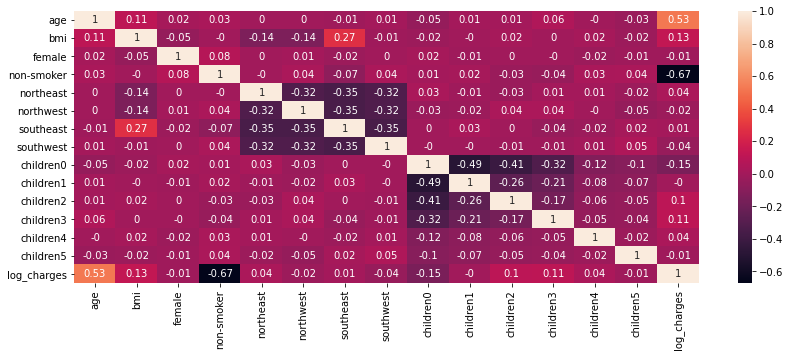

In [300]:
# Correlation Heatmap

df_corr = df
df_corr = df_corr.drop('children', axis=1)
df_corr = df_corr.drop('smoker', axis=1)
df_corr = df_corr.drop('region', axis=1)
df_corr = df_corr.drop('charges', axis=1)
plt.figure(figsize = (14,5))
heatmap = sns.heatmap(round(df_corr.corr(),2), annot=True)
plt.show

* Negative correlation between non-smokers and medical costs
* Positive correlation between age and medical costs
* Small positive correlation between bmi and medical costs

In [294]:
# Multiple Linear Regression

y = df['log_charges']
x1 = df[['age', 'bmi', 'female', 'non-smoker', 'northeast','northwest', 'southwest', 'children0', 'children1', 'children2', 'children3', 'children5']]
results = sm.OLS(y,x1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            log_charges   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              9355.
Date:                Fri, 30 Apr 2021   Prob (F-statistic):                        0.00
Time:                        11:05:03   Log-Likelihood:                         -1880.8
No. Observations:                1337   AIC:                                      3786.
Df Residuals:                    1325   BIC:                                      3848.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0475      0.002     24.827      0.000       0.044       0.051
bmi            0.0989      0.004     25.476      0.000       0.091       0.106
female         0.2359      0.054      4.343      0.000       0.129       0.342
non-smoker    -1.1490      0.067    -17.232      0.000      -1.280      -1.018
northeast      0.8574      0.075     11.358      0.000       0.709       1.006
northwest      0.7676      0.076     10.107      0.000       0.619       0.917
southwest      0.5899      0.075      7.852      0.000       0.442       0.737
children0      4.3529      0.137     31.700      0.000       4.084       4.622
children1      4.4910      0.142     31.560      0.000       4.212       4.770
children2      4.5985      0.147     31.301      0.000       4.310       4.887
children3      4.5332      0.155     29.228      0.000       4.229       4.837
children5      4.9165      0.266     18.453      0.000       4.394       5.439
==============================================================================
Omnibus:                      638.944   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4849.341
Skew:                           2.078   Prob(JB):                         0.00
Kurtosis:                      11.353   Cond. No.                         616.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Best Fit Model 

* Adjusted R^2 = 98.8
* F-Statistic = 9355
* All independent variables have a p-value = 0